### Programming for Data Analysis Project 1

### 1. Introduction  

For this project we chose **Quality of Life** dataset by O.Karaman retreived from Kaggle platform.[[1]](https://www.kaggle.com/datasets/orhankaramancode/city-quality-of-life-dataset) Data were acquired from Teleport.org and contain scores on different variables about the life in the cities around the world allowing users to compare them in order to ease the decision of choosing a place to live. [[2]](https://teleport.org/about-us/)    

To simplify the analysis, we didn't use the entire dataset, instead we picked some of the variables we found the most interesting and explored the relationship between them. Initially, eight variables were chosen: Name of the City, Country, Continent and scores variables: Business Freedom, Safety, Education, Economy and Tolerance. The idea was to see how the Tolerance scores vary depending on the other scores variables but the correlation between them turned out to be low which made data generating more difficult. The choice of the variables was changed after we checked the correlation for the whole dataset. New variables that were analysed are: **City, Country, Continent, Housing, Cost of Living, Business Freedom and Education**.  

To describe what **variables** are representing we took a look behind data at Teleport.org:[[3]](https://teleport.org/cities/dublin/)  
    
**Housing** includes prices of the apartments and rent index,  
**Cost of Living** refers to groceries and transport expenses as well as the inflation score,   
**Business Freedom** implies freedom from corruption and labor restrictions,  
**Education** refers to PISA ranking, happiness of the students and university quality 

### 2. Exploring Data

Even though data were already pre-processed, since we didn't use the whole dataset, additional cleaning was done.   
First, we took a look at data as they were retrieved. They are uploaded in csv format as scoresData.csv.

#### 2.1. Importing libraries and reading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [2]:
scores = pd.read_csv('scoresData.csv')

To see the first couple of rows we used the head() function.   
We have 21 columns of which the first one shows indexes of rows, next three are Name (of the cities), Country and Continent for which the scores in the variables are shown.  


In [3]:
scores.head()

,Unnamed: 0,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,...,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors
0,0,Aarhus,Denmark,Europe,6.1315,4.015,2.8270,2.512,3.5360,6.31175,...,9.6165,8.704333,5.3665,7.63300,4.8865,5.0680,8.373,3.1870,9.7385,4.1300
1,1,Adelaide,Australia,Oceania,6.3095,4.692,3.1365,2.640,1.7765,5.33625,...,7.9260,7.936667,5.1420,8.33075,6.0695,4.5885,4.341,4.3285,7.8220,5.5310
2,2,Albuquerque,New Mexico,North America,7.2620,6.059,3.7720,1.493,1.4555,5.05575,...,1.3435,6.430000,4.1520,7.31950,6.5145,4.3460,5.396,4.8900,7.0285,3.5155
3,3,Almaty,Kazakhstan,Asia,9.2820,9.333,2.4585,0.000,4.5920,5.87125,...,7.3090,4.545667,2.2830,3.85675,5.2690,8.5220,2.886,2.9370,6.5395,5.5000
4,4,Amsterdam,Netherlands,Europe,3.0530,3.824,7.9715,6.107,8.3245,6.11850,...,8.5035,7.907333,6.1800,7.59725,5.0530,4.9550,4.523,8.8740,8.3680,5.3070


#### 2.2. Types of data

Types of data in dataframe are checked with the info() function. Scores for variables such as Housing, Cost of Living, Startups and the rest are float data type while categorial variables: Name (of the city), Country and Continent have object data types.  
According to the output none of the entries are null, there are no missing values, although, just by looking at data we can see zeroes are included. Since we didn't use the entire dataset, we dealt with zeroes later, after we picked the variables for analysis.  


In [4]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             266 non-null    int64  
 1   UA_Name                266 non-null    object 
 2   UA_Country             266 non-null    object 
 3   UA_Continent           266 non-null    object 
 4   Housing                266 non-null    float64
 5   Cost of Living         266 non-null    float64
 6   Startups               266 non-null    float64
 7   Venture Capital        266 non-null    float64
 8   Travel Connectivity    266 non-null    float64
 9   Commute                266 non-null    float64
 10  Business Freedom       266 non-null    float64
 11  Safety                 266 non-null    float64
 12  Healthcare             266 non-null    float64
 13  Education              266 non-null    float64
 14  Environmental Quality  266 non-null    float64
 15  Econom

### 3. Data Cleaning

To make dataset look neat we changed the names of the variables.

In [5]:
scores = scores.rename(columns={"UA_Name": "City", "UA_Country": "Country", "UA_Continent": "Continent"})
scores

,Unnamed: 0,City,Country,Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,...,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors
0,0,Aarhus,Denmark,Europe,6.1315,4.015,2.8270,2.512,3.5360,6.31175,...,9.6165,8.704333,5.3665,7.63300,4.8865,5.0680,8.3730,3.1870,9.7385,4.1300
1,1,Adelaide,Australia,Oceania,6.3095,4.692,3.1365,2.640,1.7765,5.33625,...,7.9260,7.936667,5.1420,8.33075,6.0695,4.5885,4.3410,4.3285,7.8220,5.5310
2,2,Albuquerque,New Mexico,North America,7.2620,6.059,3.7720,1.493,1.4555,5.05575,...,1.3435,6.430000,4.1520,7.31950,6.5145,4.3460,5.3960,4.8900,7.0285,3.5155
3,3,Almaty,Kazakhstan,Asia,9.2820,9.333,2.4585,0.000,4.5920,5.87125,...,7.3090,4.545667,2.2830,3.85675,5.2690,8.5220,2.8860,2.9370,6.5395,5.5000
4,4,Amsterdam,Netherlands,Europe,3.0530,3.824,7.9715,6.107,8.3245,6.11850,...,8.5035,7.907333,6.1800,7.59725,5.0530,4.9550,4.5230,8.8740,8.3680,5.3070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,261,Winnipeg,Canada,North America,7.5525,5.882,3.7965,0.000,1.4755,5.10450,...,6.0155,7.755667,5.3440,5.67475,5.8405,7.2745,4.9025,4.6880,6.6590,4.2430
262,262,Wroclaw,Poland,Europe,8.4520,8.434,3.5860,2.386,2.2445,4.95475,...,8.1655,6.781333,4.1615,4.96475,4.7615,5.0970,5.7615,4.7495,3.9045,4.0850
263,263,Yerevan,Armenia,Asia,9.6945,9.431,3.9265,0.000,1.7870,5.64925,...,8.8730,5.102000,0.0000,4.43950,3.4580,8.0550,3.9000,4.7370,7.3465,7.7765
264,264,Zagreb,Croatia,Europe,8.9100,7.194,4.4530,1.775,2.0280,4.83000,...,8.6575,7.266000,3.2110,7.33150,2.2365,7.9935,5.0335,4.9945,7.9545,4.8090


After exploring the ways of how to remove columns we don't want in a dataset, it was decided we are going to drop them by indexes.  
This was the initial choice of the variables: City, Country, Continent, Business Freedom, Safety, Education, Economy and Tolerance.

In [6]:
# axis=1 because we are taking out columns, for rows would be axis=0
scores1 = scores.drop(scores.columns[[0, 4, 5, 6, 7, 8, 9, 12, 16, 14, 17, 18, 20]], axis=1)
scores1

,City,Country,Continent,Business Freedom,Safety,Education,Economy,Tolerance
0,Aarhus,Denmark,Europe,9.940000,9.6165,5.3665,4.8865,9.7385
1,Adelaide,Australia,Oceania,9.399667,7.9260,5.1420,6.0695,7.8220
2,Albuquerque,New Mexico,North America,8.671000,1.3435,4.1520,6.5145,7.0285
3,Almaty,Kazakhstan,Asia,5.568000,7.3090,2.2830,5.2690,6.5395
4,Amsterdam,Netherlands,Europe,8.836667,8.5035,6.1800,5.0530,8.3680
...,...,...,...,...,...,...,...,...
261,Winnipeg,Canada,North America,8.966000,6.0155,5.3440,5.8405,6.6590
262,Wroclaw,Poland,Europe,5.704333,8.1655,4.1615,4.7615,3.9045
263,Yerevan,Armenia,Asia,6.501000,8.8730,0.0000,3.4580,7.3465
264,Zagreb,Croatia,Europe,5.720333,8.6575,3.2110,2.2365,7.9545


The highest correlation in dataset scores1 was between Business Freedom and Education (**0.75**) and Business Freedom and Economy (**0.63**).  
Tolerance and Safety were not correlated well to any of the variables.

In [7]:
scores1.corr()

,Business Freedom,Safety,Education,Economy,Tolerance
Business Freedom,1.000000,-0.039642,0.757955,0.633438,0.362165
Safety,-0.039642,1.000000,0.063285,-0.241724,0.374310
Education,0.757955,0.063285,1.000000,0.513191,0.290475
Economy,0.633438,-0.241724,0.513191,1.000000,0.049305
Tolerance,0.362165,0.374310,0.290475,0.049305,1.000000


We decided to check the correlation between all the variables

In [8]:
type(scores.style)

pandas.io.formats.style.Styler

In [9]:
# put the ref here
correlation_matrix = scores.corr()
(correlation_matrix.style
     .background_gradient(cmap='viridis', axis=None)
     .set_properties(**{'text-align': 'center', 'padding': '12px'})
     .set_caption('CORRELATION MATRIX'))

,Unnamed: 0,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors
Unnamed: 0,1.000000,-0.009494,-0.027777,0.060980,0.044531,-0.001856,0.077030,0.063219,0.091281,0.101955,0.083151,0.023297,-0.041487,0.099252,0.023454,0.183162,0.052920,0.112169
Housing,-0.009494,1.000000,0.794576,-0.344616,-0.462969,-0.233817,0.176004,-0.434984,0.011744,-0.166979,-0.549433,-0.417733,-0.490245,-0.006933,-0.301744,-0.008200,-0.231671,-0.165504
Cost of Living,-0.027777,0.794576,1.000000,0.024625,-0.132262,-0.134216,0.258755,-0.423645,-0.080333,-0.291351,-0.430197,-0.467667,-0.327045,0.050611,-0.259348,0.184746,-0.336006,-0.030579
Startups,0.060980,-0.344616,0.024625,1.000000,0.796214,0.276168,0.074896,0.215702,-0.209409,-0.094998,0.376239,0.009754,0.342311,-0.025140,0.193212,0.446968,-0.142096,0.253849
Venture Capital,0.044531,-0.462969,-0.132262,0.796214,1.000000,0.368431,0.097133,0.250429,-0.119737,0.032858,0.524150,0.103033,0.373194,-0.101222,0.266309,0.332004,-0.094176,0.269301
Travel Connectivity,-0.001856,-0.233817,-0.134216,0.276168,0.368431,1.000000,0.335116,0.262558,0.260882,0.420599,0.467939,0.108372,0.038983,-0.163445,0.233239,0.312039,0.018287,0.137784
Commute,0.077030,0.176004,0.258755,0.074896,0.097133,0.335116,1.000000,0.249281,0.247376,0.378433,0.297148,0.180436,-0.016677,0.088150,0.139976,0.204701,0.178782,0.106959
Business Freedom,0.063219,-0.434984,-0.423645,0.215702,0.250429,0.262558,0.249281,1.000000,-0.039642,0.636899,0.757955,0.706070,0.633438,0.022459,0.518809,0.054772,0.362165,0.081172
Safety,0.091281,0.011744,-0.080333,-0.209409,-0.119737,0.260882,0.247376,-0.039642,1.000000,0.283774,0.063285,0.139070,-0.241724,0.290702,-0.012387,-0.121699,0.374310,0.042888
Healthcare,0.101955,-0.166979,-0.291351,-0.094998,0.032858,0.420599,0.378433,0.636899,0.283774,1.000000,0.605745,0.516984,0.158573,-0.078670,0.302419,0.092242,0.462240,0.038526


Based on correlation table we decided to keep **City, Country, Continent, Housing, Cost of Living, Business Freedom and Education.**  

In [10]:
scores = scores.drop(scores.columns[[0, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20]], axis=1)
scores

,City,Country,Continent,Housing,Cost of Living,Business Freedom,Education
0,Aarhus,Denmark,Europe,6.1315,4.015,9.940000,5.3665
1,Adelaide,Australia,Oceania,6.3095,4.692,9.399667,5.1420
2,Albuquerque,New Mexico,North America,7.2620,6.059,8.671000,4.1520
3,Almaty,Kazakhstan,Asia,9.2820,9.333,5.568000,2.2830
4,Amsterdam,Netherlands,Europe,3.0530,3.824,8.836667,6.1800
...,...,...,...,...,...,...,...
261,Winnipeg,Canada,North America,7.5525,5.882,8.966000,5.3440
262,Wroclaw,Poland,Europe,8.4520,8.434,5.704333,4.1615
263,Yerevan,Armenia,Asia,9.6945,9.431,6.501000,0.0000
264,Zagreb,Croatia,Europe,8.9100,7.194,5.720333,3.2110


Next, we checked for zeroes in columns containing scores. Index slicing was used to remove zero values. [[3]](https://www.youtube.com/watch?v=i4cI4y9cLzg)

In [11]:
scores.columns[3:]

Index(['Housing', 'Cost of Living', 'Business Freedom', 'Education'], dtype='object')

In [12]:
scores[(scores[scores.columns[3:]]==0).any(axis=1)]

,City,Country,Continent,Housing,Cost of Living,Business Freedom,Education
6,Andorra,Andorra,Europe,3.9690,0.000,0.000000,0.0000
9,Asuncion,Paraguay,South America,9.2265,9.295,3.684000,0.0000
14,Baku,Azerbaijan,Asia,9.7450,9.806,5.671667,0.0000
15,Bali,Indonesia,Asia,5.0000,0.000,3.912333,0.5275
23,Belize City,Belize,North America,4.6425,0.000,3.411000,0.0000
37,Bozeman,Montana,North America,2.9490,0.000,8.671000,4.1280
52,Caracas,Venezuela,South America,4.9025,9.820,1.000000,0.0000
54,Casablanca,Morocco,Africa,8.8220,9.088,5.614333,0.0000
73,Dar es Salaam,Tanzania,Africa,7.6520,8.026,3.288667,0.0000
89,Fort Collins,Colorado,North America,2.7445,0.000,8.671000,4.1735


After removing zeroes we got dataset of 229 rows through 7 columns

In [13]:
scores = scores[~(scores[scores.columns[3:]]==0).any(axis=1)]
scores

,City,Country,Continent,Housing,Cost of Living,Business Freedom,Education
0,Aarhus,Denmark,Europe,6.1315,4.015,9.940000,5.3665
1,Adelaide,Australia,Oceania,6.3095,4.692,9.399667,5.1420
2,Albuquerque,New Mexico,North America,7.2620,6.059,8.671000,4.1520
3,Almaty,Kazakhstan,Asia,9.2820,9.333,5.568000,2.2830
4,Amsterdam,Netherlands,Europe,3.0530,3.824,8.836667,6.1800
...,...,...,...,...,...,...,...
260,Wellington,New Zealand,Oceania,5.1345,5.161,10.000000,4.7560
261,Winnipeg,Canada,North America,7.5525,5.882,8.966000,5.3440
262,Wroclaw,Poland,Europe,8.4520,8.434,5.704333,4.1615
264,Zagreb,Croatia,Europe,8.9100,7.194,5.720333,3.2110


To get all scores with the same number of decimals we used round function.

In [14]:
scores.round(decimals=3)

,City,Country,Continent,Housing,Cost of Living,Business Freedom,Education
0,Aarhus,Denmark,Europe,6.132,4.015,9.940,5.366
1,Adelaide,Australia,Oceania,6.310,4.692,9.400,5.142
2,Albuquerque,New Mexico,North America,7.262,6.059,8.671,4.152
3,Almaty,Kazakhstan,Asia,9.282,9.333,5.568,2.283
4,Amsterdam,Netherlands,Europe,3.053,3.824,8.837,6.180
...,...,...,...,...,...,...,...
260,Wellington,New Zealand,Oceania,5.134,5.161,10.000,4.756
261,Winnipeg,Canada,North America,7.552,5.882,8.966,5.344
262,Wroclaw,Poland,Europe,8.452,8.434,5.704,4.162
264,Zagreb,Croatia,Europe,8.910,7.194,5.720,3.211


### 4. Statistics

Descriptive statistics

In [15]:
scores.describe()

,Housing,Cost of Living,Business Freedom,Education
count,229.000000,229.000000,229.000000,229.000000
mean,6.531417,5.963904,7.710937,4.258179
std,2.135435,1.878591,1.736523,1.929332
min,1.000000,1.000000,2.781000,0.500000
25%,5.433500,4.927000,6.212667,3.624500
50%,6.727000,5.623000,8.671000,4.393500
75%,8.177000,7.237000,8.888000,5.345500
max,10.000000,10.000000,10.000000,9.711000


Group cities by continents

In [16]:
scores['Continent'].value_counts()

Europe           105
North America     73
Asia              27
South America     11
Oceania            8
Africa             5
Name: Continent, dtype: int64

Strip plot for each score variable grouped by continents.

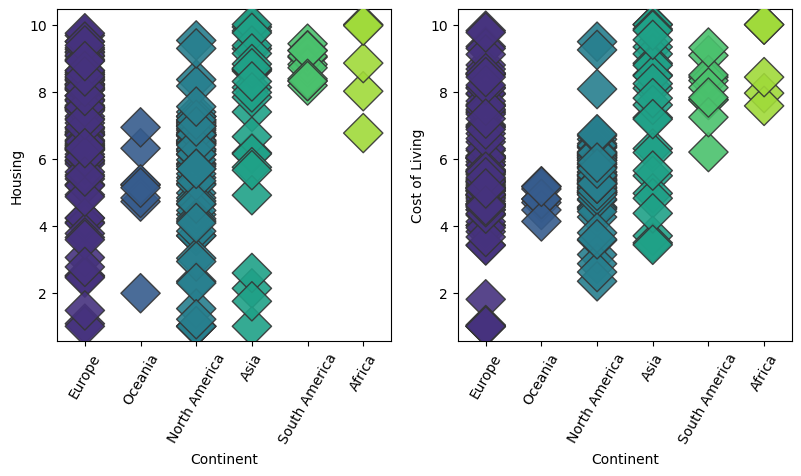

In [17]:
plt.figure(figsize = (25,25))

plt.subplot(5, 5, 1)
sns.stripplot(data=scores, x='Continent', y='Housing', jitter=False, s=20, marker="D", linewidth=1, alpha=.9, palette="viridis")
plt.xticks(rotation=60);

plt.subplot(5, 5, 2)
sns.stripplot(data=scores, x='Continent', y='Cost of Living', jitter=False, s=20, marker="D", linewidth=1, alpha=.9, palette="viridis")
plt.xticks(rotation=60);

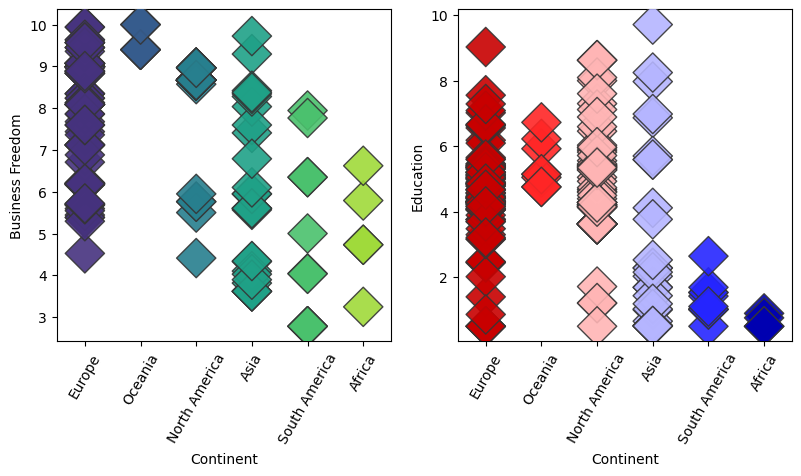

In [31]:
plt.figure(figsize = (25,25))

plt.subplot(5, 5, 1)
sns.stripplot(data=scores, x='Continent', y='Business Freedom', jitter=False, s=20, marker="D", linewidth=1, alpha=.9, palette="viridis")
plt.xticks(rotation=60);

plt.subplot(5, 5, 2)
sns.stripplot(data=scores, x='Continent', y='Education', jitter=False, s=20, marker="D", linewidth=1, alpha=.9, palette="seismic_r")
plt.xticks(rotation=60);

In [19]:
print(sns.color_palette("seismic_r").as_hex())

['#c80000', '#ff2525', '#ffb5b5', '#b5b5ff', '#2525ff', '#0000b1']


In [26]:
print(sns.color_palette("viridis").as_hex())

['#46327e', '#365c8d', '#277f8e', '#1fa187', '#4ac16d', '#a0da39']


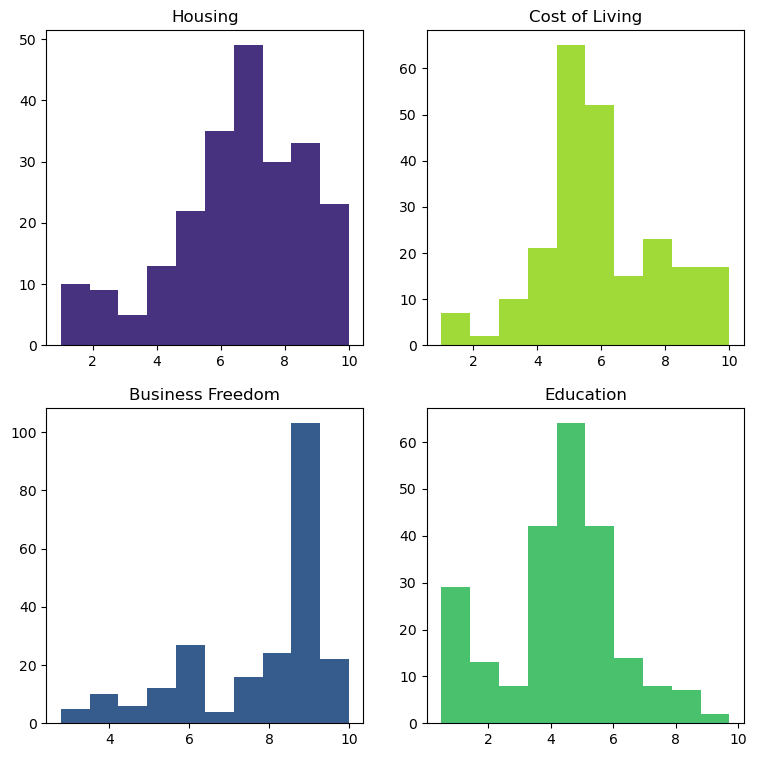

In [30]:
plt.figure(figsize = (9,9))

plt.subplot(2, 2, 1)
plt.hist(scores['Housing'], color='#46327e')
plt.title(label='Housing');

plt.subplot(2, 2, 2)
plt.hist(scores['Cost of Living'], color='#a0da39')
plt.title(label='Cost of Living');

plt.subplot(2, 2, 3)
plt.hist(scores['Business Freedom'], color='#365c8d')
plt.title(label='Business Freedom');

plt.subplot(2, 2, 4)
plt.hist(scores['Education'], color='#4ac16d')
plt.title(label='Education');

Show correlation between variables

In [22]:
scores.corr()

,Housing,Cost of Living,Business Freedom,Education
Housing,1.000000,0.783637,-0.564009,-0.677656
Cost of Living,0.783637,1.000000,-0.724444,-0.691075
Business Freedom,-0.564009,-0.724444,1.000000,0.677346
Education,-0.677656,-0.691075,0.677346,1.000000


We are going to take first 150 data for testing.

In [23]:
# These are data we are going to take out and keep in a different dataset
scorescontrol = scores.iloc[200:]
scorescontrol.to_csv('scorescontrol.csv')

In [24]:
controlread = pd.read_csv('scorescontrol.csv')
controlread

,Unnamed: 0,City,Country,Continent,Housing,Cost of Living,Business Freedom,Education
0,234,Tallinn,Estonia,Europe,8.3765,6.931,8.129333,5.3550
1,235,Tampa Bay Area,Florida,North America,5.6960,5.253,8.671000,4.2805
2,236,Tampere,Finland,Europe,6.9360,4.622,9.450667,5.3895
3,237,Tartu,Estonia,Europe,8.9610,7.470,8.129333,5.4035
4,239,Tbilisi,Georgia,Europe,9.4905,9.765,7.863333,0.8625
5,240,Tehran,Iran,Asia,8.3030,9.544,4.342667,0.5100
6,241,Tel Aviv,Israel,Asia,4.9100,4.370,6.790000,3.7665
7,242,The Hague,Netherlands,Europe,6.0530,4.653,8.836667,4.3065
8,243,Thessaloniki,Greece,Europe,9.3775,6.600,6.169000,3.1635
9,244,Tokyo,Japan,Asia,5.6570,3.431,8.377667,6.9805


In [25]:
controlread = controlread.drop(controlread.columns[[0, 4, 6, 7, 8, 9]], axis=1)
controlread

IndexError: index 8 is out of bounds for axis 0 with size 8

In [ ]:
rng = np.random.default_rng()
def efg(bf):
    if bf <= 6.206917:
        return rng.random() * (3.624500-0.500000) + 0.500000
    if bf <= 8.671000:
        return rng.random() * (4.306500-3.624500) + 3.624500
    if bf <= 8.888000:
        return rng.random() * (5.302375-4.306500) + 4.306500
    else: 
        return rng.random() * (9.711000-5.302375) + 5.302375
    
efg(0.55)

In [ ]:
controlread.insert(4, 'Education', True)
controlread['Education'] = controlread['Business Freedom'].apply(efg)
controlread

In [ ]:
corr2 = controlread.corr()
corr2

In [ ]:
scores = scores.iloc[:200]
scores

In [ ]:
scores.to_csv('scorestest.csv', index=False)

In [ ]:
correlation = scores.corr()
correlation

Random generator

In [ ]:
#returns floating point number between 0 and 1
rng = np.random.default_rng()
rng.random()

In [ ]:
scores

In [ ]:
newVar = rng.normal(5.962835, 1.863146, size=200)
newVar

In [ ]:
scores.insert(9, 'CostOfL2', newVar, True)
scores

In [ ]:
plt.hist(scores['CostOfL2'])
plt.title(label='CostOfL2')
plt.savefig('CostOfL2_distribution')
plt.show()

In [ ]:
newCorr = scores.corr()
newCorr

In [ ]:
newVar = rng.normal(5.962835, 1.863146, size=200)
newVar

In [ ]:
plt.hist(scores['newNewCostOfLiving'])
plt.title(label='newNewCostOfLiving')
#plt.savefig('newNewCostOfLiving_distribution')
plt.show()

References:  
    [1]: Karaman, O. (n.d.). City Quality of Life Dataset., Version 1, Retreived November 24, 2022 from https://www.kaggle.com/datasets/orhankaramancode/city-quality-of-life-dataset  
    [2]: Teleport, (n.d). About us, Retreived November 24, 2022 from https://teleport.org/about-us/  
    

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html    
https://stackoverflow.com/questions/19482970/get-a-list-from-pandas-dataframe-column-headers  
https://www.geeksforgeeks.org/print-lists-in-python-4-different-ways/  
https://sparkbyexamples.com/pandas/pandas-drop-columns-examples/  
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html  
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html  
https://www.youtube.com/watch?v=i4cI4y9cLzg  
https://www.freecodecamp.org/news/drop-list-of-rows-from-pandas-dataframe/    
https://www.youtube.com/watch?v=kprbThEGKf0  
https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/  
https://numpy.org/doc/stable/reference/random/generator.html
https://www.youtube.com/watch?v=4DnWYK88-E4  
https://www.kaggle.com/code/ahmetozdemir1071/city-quality-of-life-data-visualization  
https://seaborn.pydata.org/generated/seaborn.stripplot.html  
https://teleport.org/cities/dublin/  
https://www.analyticsvidhya.com/blog/2020/09/colormaps-matplotlib/  